In [3]:
from environnement.small_loop import small_loop
from model.Tokenizer import SimpleTokenizerV1
from environnement.gridWorld import gridWorld
from environnement.tools import *
from environnement.Robot import Robot
from outil import *
from model.OneHot import OneHot

from model.TokenDrop import TokenDropOddWithOH

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

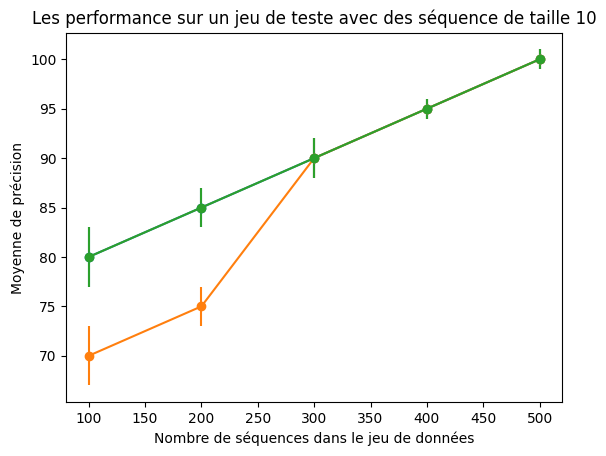

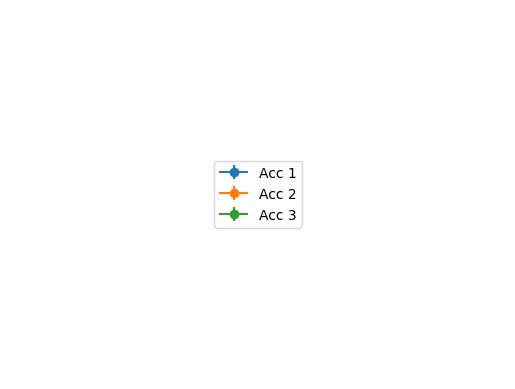

In [ ]:
import matplotlib
moy_1 = [80, 85, 90, 95, 100]
moy_2 = [70, 75, 90, 95, 100]
moy_3 = [80, 85, 90, 95, 100]

std_1 = [3, 2, 2, 1, 1]
std_2 = [3, 2, 2, 1, 1]
std_3 = [3, 2, 2, 1, 1]



# Make graph with 3 curve and 5 points each, legend in a separate figure
def make_graph(moy_1, moy_2, moy_3, std_1, std_2, std_3):
    x = [100, 200, 300, 400, 500] 
    fig, ax = plt.subplots()
    line1 = ax.errorbar(x, moy_1, yerr=std_1, label='Acc 1', fmt='-o')
    line2 = ax.errorbar(x, moy_2, yerr=std_2, label='Acc 2', fmt='-o')
    line3 = ax.errorbar(x, moy_3, yerr=std_3, label='Acc 3', fmt='-o')

    ax.set_xlabel('Nombre de séquences dans le jeu de données')
    ax.set_ylabel('Moyenne de précision')
    ax.set_title('Les performances sur un jeu de teste avec des séquence de taille 10')
    plt.show()

    # Create a separate figure for the legend
    fig_legend = plt.figure()
    fig_legend.legend([line1, line2, line3], ['Acc 1', 'Acc 2', 'Acc 3'], loc='center')
    fig_legend.canvas.draw()
    plt.axis('off')
    plt.show()
    
make_graph(moy_1, moy_2, moy_3, std_1, std_2, std_3)


In [ ]:
list_vocab = ['<pad>', 'forward', 'feel_front','feel_left', 'feel_right', 'turn_left', 'turn_right', 'empty', 'wall']
tmp = create_dico_numerate_word(list_vocab)
test = OneHot(tmp)

for i in range(len(list_vocab)):
    print(test.encode(list_vocab[i]))
    one_hot_encode = test.encode(list_vocab[i])
    print(one_hot_encode)
    print(test.decode(one_hot_encode))
    print("___________________________")
    
print(test.encode('empty'))
seq = \
['feel_right', 'empty', 'feel_right', 'empty', 'turn_right', 'empty', 'turn_right', 'empty', 'feel_right', 'empty', 'feel_left', 'empty', 'feel_left', 'empty', 'turn_left', 'empty', 'turn_left', 'empty', 'forward', 'wall', 'feel_left', 'empty', 'feel_left', 'empty', 'turn_right', 'empty', 'forward', 'empty', 'feel_front', 'wall', 'feel_front', 'wall', 'turn_right', 'empty', 'feel_right', 'empty', 'turn_left', 'empty', 'feel_left', 'wall', 'feel_left', 'wall', 'feel_front', 'wall', 'turn_right', 'empty', 'feel_front', 'empty', 'turn_left', 'empty', 'turn_right', 'empty', 'feel_right', 'empty', 'forward', 'empty', 'feel_right', 'empty', 'turn_left', 'empty', 'forward', 'wall', 'feel_right', 'empty', 'feel_right', 'empty', 'forward', 'wall', 'feel_front', 'wall', 'feel_front', 'wall', 'turn_left', 'empty', 'feel_left', 'empty', 'feel_right', 'wall', 'turn_right', 'empty', 'forward', 'wall', 'forward', 'wall', 'turn_left', 'empty', 'feel_left', 'empty', 'feel_right', 'wall', 'turn_right', 'empty', 'turn_left', 'empty', 'forward', 'empty', 'feel_right', 'wall', 'feel_front', '<pad>']
tmp = test.encode(seq)
print(test.decode(tmp))


[1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0]
['<pad>']
___________________________
[0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0]
['forward']
___________________________
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
['feel_front']
___________________________
[0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
['feel_left']
___________________________
[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0]
['feel_right']
___________________________
[0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0]
['turn_left']
___________________________
[0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0]
['turn_right']
___________________________
[0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
['empty']
___________________________
[0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
['wall']
___________________________
[0, 0, 0, 0, 0, 0, 0, 1, 0]
['turn_left', 'empty', 'turn_left', 'empty', 'turn_left', 'empty', 'feel_front', 'wall', 'feel_right',

In [3]:
x = torch.tensor([0, 2, 4])
y = torch.tensor([1, 3, 5])

# Redimensionner et concaténer en une seule étape
stacked = torch.cat((x.unsqueeze(1), y.unsqueeze(1)), dim=1)

print("stack :")
print(stacked, stacked.shape)

stack :
tensor([[0, 1],
        [2, 3],
        [4, 5]]) torch.Size([3, 2])


In [14]:
td = TokenDropOddWithOH(test, 0.9)
seq = ['turn_left', 'wall', 'feel_front', 'empty', 'turn_left', 'empty']

tensor_test = torch.tensor(test.encode(seq))
tensor_test = tensor_test.unsqueeze(0)

print(torch.unflatten(tensor_test, 1, (6, 9)))
res = td(tensor_test)
# pass 1, 54 to 1, 6, 9
res = torch.unflatten(res, 1, (6, 9))
print(res, res.shape)


tensor([[[0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0]]])
tensor([[0, 1],
        [0, 1],
        [0, 1]])
tensor([0, 1, 0, 1, 0, 1])
tensor([[[ 0,  0,  0,  0,  0,  1,  0,  0,  0],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [ 0,  0,  1,  0,  0,  0,  0,  0,  0],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [ 0,  0,  0,  0,  0,  1,  0,  0,  0],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1]]]) torch.Size([1, 6, 9])


In [ ]:

print(torch.zeros_like(tensor_test))
print(0.2 * torch.ones_like(tensor_test))

print(torch.bernoulli(0.1 * torch.ones_like(tensor_test)).long())

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]])
tensor([[0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
         0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
         0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
         0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
         0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
         0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]])


In [2]:
seq =\
['feel_right', 'empty', 'feel_right', 'empty', 'turn_right', 'empty', 'turn_right', 'empty', 'feel_right', 'empty', 'feel_left', 'empty', 'feel_left', 'empty', 'turn_left', 'empty', 'turn_left', 'empty', 'forward', 'wall', 'feel_left', 'empty', 'feel_left', 'empty', 'turn_right', 'empty', 'forward', 'empty', 'feel_front', 'wall', 'feel_front', 'wall', 'turn_right', 'empty', 'feel_right', 'empty', 'turn_left', 'empty', 'feel_left', 'wall', 'feel_left', 'wall', 'feel_front', 'wall', 'turn_right', 'empty', 'feel_front', 'empty', 'turn_left', 'empty', 'turn_right', 'empty', 'feel_right', 'empty', 'forward', 'empty', 'feel_right', 'empty', 'turn_left', 'empty', 'forward', 'wall', 'feel_right', 'empty', 'feel_right', 'empty', 'forward', 'wall', 'feel_front', 'wall', 'feel_front', 'wall', 'turn_left', 'empty', 'feel_left', 'empty', 'feel_right', 'wall', 'turn_right', 'empty', 'forward', 'wall', 'forward', 'wall', 'turn_left', 'empty', 'feel_left', 'empty', 'feel_right', 'wall', 'turn_right', 'empty', 'turn_left', 'empty', 'forward', 'empty', 'feel_right', 'wall', 'feel_front', '<pad>']

In [3]:
len(seq)

100

In [4]:
list_array, x, y, theta = process_sequence(seq, 6, "imgToGif")
print('in memory : ', info_in_memory(list_array))
print(info_in_seq(seq, 6))
print(info_step_in_memory(list_array))

in memory :  True
True
19


In [ ]:
list_array, x, y, theta = process_sequence_inter(seq, 6, "imgToGif")
print('in memory : ', info_in_memory(list_array))
print(info_in_seq(seq, 6))
print(info_step_in_memory(list_array))

In [11]:
print(feel_info_end_sequence(seq, 6))

print(feel_info_end_sequence(seq, 6, (list_array, x, y, theta)))

[False, True, True]
[False, True, True]


In [ ]:
# def feel_info_end_sequence(seq: list, size: int):
#     """
#     This function analyzes a sequence of interactions and determines for each feeling if
#     sequence have information.

#     Parameters:
#     seq (list): A list of interaction in this format ['action', 'feedback', ...].
#     size (int): This size must correspond to twice the maximum length of the environment.

#     Returns:
#     list: A list of boolean values indicating whether each "feeling" action at the end 
#           of the sequence provides information (True) or not (False).
#     """
#     last_step_info = -2 if seq[-1] == '<pad>' else -1
#     list_array, x, y, theta = process_sequence(seq, size, "imgToGif")
#     # print('x, y, theta : ', x, y, theta)
#     directions_x = [
#         -1,
#         0,
#         1,
#         0,
#     ]
#     directions_y = [
#         0,
#         1,
#         0,
#         -1,
#     ]

#     feel_bool = []
#     for i in range(-1, 2):
#         theta_feel = (theta + i) % 4
#         x_feel = x + directions_x[theta_feel]
#         y_feel = y + directions_y[theta_feel]
#         feel_bool.append(bool(list_array[last_step_info] [x_feel, y_feel] != 1))
#     return feel_bool
# print(feel_info_end_sequence(seq, 6))



[True, True, True]


In [4]:
dict_test = {}
dict_test.update({'empty': {"action": "feel",'expected':0 }})
dict_test.update({'wall': {"action": "feel",'expected':0 }})
print(dict_test)

{'empty': {'action': 'feel', 'expected': 0}, 'wall': {'action': 'feel', 'expected': 0}}


In [5]:
dict_test_child = [{
    "action": "forward",
    "expected_valence": -20
},
{
    "action": "feel",
    "expected_valence": -10
},
{
    "action": "turn",
    "expected_valence": -40
}]
best_child = max(dict_test_child, key=lambda x: x["expected_valence"])
print(best_child)

{'action': 'feel', 'expected_valence': -10}


In [6]:
import numpy as np
# env = gridWorld(x=1, y=1, theta=0, world=np.array([
#                 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#                 [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
#                 [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
#                 [1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
#                 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
#                 [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
#                 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                
#             ]))

# env.display_world()
# env.get_world()

env = gridWorldMoreFB(x=1, y=1, theta=0, range_feel=3, world=np.array([
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
                [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
                [1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
                [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
                [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                
            ]))

env.display_world()
env.get_world()

env.display_world()
env.get_world()

NameError: name 'gridWorldMoreFB' is not defined

In [ ]:
env.outcome("forward")

In [ ]:
print(env.get_outcomes())

In [ ]:
env.outcome("turn_right")


In [ ]:
print(env.outcome("feel_right"))
env.display_world()

In [ ]:
print(env.outcome("feel_left"))
env.display_world()

In [ ]:
print(env.outcome("feel_front"))
env.display_world()

In [ ]:
# 100 act rand
acts = []
fbs = []
interactions = []

for _ in range(1000):
    act = str(np.random.choice(env.get_actions()))
    fb = env.outcome(act)
    acts.append(act)
    fbs.append(fb)
    interactions += [act, fb]

In [ ]:
print(interactions)

In [ ]:
def find_sub_list(liste):
    pattern = {}
    
    for i in range(0, len(liste) - 4, 2):
        if pattern.get(str(liste[i:i+3])) == None:
            pattern[str(liste[i:i+3])] = {"fb":liste[i + 3], "count":1}
        else:
            if pattern[str(liste[i:i+3])]["count"] != -1:
                pattern[str(liste[i:i+3])]["count"] += 1
            if pattern[str(liste[i:i+3])]["fb"] != liste[i + 3]:
                pattern[str(liste[i:i+3])]["count"] = -1
    return pattern

find_sub_list(interactions)

In [ ]:
def replace_sub_list(liste, pattern:dict):
    new_list = []
    list_pattern = pattern.keys()
    for i in range(0, len(liste) - 4, 2):
        if 
        
    return pattern

In [ ]:
dicco = {
    'a': 0,
    'b': 1,
    'c': 3,
    'd': 4,
    'e': 5,
    'f': 6,
    'g': 7,
    'h': 8,
    'i': 9,
    'j': 10,
}

tokenizer = SimpleTokenizerV1(dicco)

data = CustomLoader(['a', 'b', 'c', 'd', 'e'], ['a', 'b', 'a', 'b', 'b'], 3, tokenizer)
print(data.__len__())
for i in range(data.__len__()):
    print(data.__getitem__(i))
    print('---')

In [ ]:
import numpy as np
env:small_loop = small_loop(x=1, y=1, theta=0, world=np.array([
                [1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 0, 1, 0, 0, 1],
                [1, 1, 1, 1, 1, 1],
            ]))
env.display_world()
env.get_world()


In [ ]:
print(env.outcome("turn_left"))
env.display_world()

In [ ]:
print(env.outcome("forward"))
env.display_world()


In [ ]:
dico = {
    0: "empty",
    1: "wall",
}

print(dico[True])

print(env.get_outcomes())